# Feature Engineering & Análisis descriptivo.

## Preparando el ambiente

### Cargando módulos

In [1]:
import warnings
# Ignorar warnings
warnings.filterwarnings("ignore")

# Importando varios módulos desde pandas
from pandas import DataFrame, read_csv, set_option, option_context, to_datetime, Series, Timedelta, merge

# Importando varios módulos desde numpy
import numpy as np

# Importando el módulo pickle
import pickle

# Importando funciones custom desde functAnalyticsHelpers.py
from lib.functAnalyticsHelpers import plot_grouped_bar, plot_hist, graficar_error

# Importando el módulo seaborn y asignando el alias sns
import seaborn as sns

# Importando el módulo matplotlib y asignando el alias plt
import matplotlib.pyplot as plt
plt.style.use("seaborn")

### Cargando dataset consolidado

In [2]:
# Preparando los datos
# ---------------------------------------------------------------------------------------
# Cargando datos
df = pickle.load(open('data/output/dataset_full_data.plk', 'rb'))#.drop(columns = ['index'])
# Usamos la función option_context para establecer el número máximo de columnas para mostrar
with option_context("display.max_columns", None):
# Usamos la función de visualización para mostrar las primeras 5 filas de los datos
    display(df.head(n = 5))

,order_id,lat_order,lng_order,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,actual_reception_time,promised_delivery_time,total_minutes_td,order_time,model_1_dt_time,model_1_time,store,lat_store,lng_store,shopper_id_picker,seniority_picker,found_rate_picker,picking_speed_picker,accepted_rate_picker,rating_picker,shopper_id_driver,seniority_driver,found_rate_driver,picking_speed_driver,accepted_rate_driver,rating_driver,total_product,real_total_unit,real_total_kg,real_without_product,total_unit,total_kg,distancia
0,6abd5e28d01b7c733fe37485294235dc,18.22114,-10.03139,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861,1900-01-01 12:00:15,1900-01-01 13:00:00,0 days 01:31:48.051660,1900-01-01 10:28:26.948340000,0 days 02:31:33.051660,151.550861,60e4c4e1c1a8bc79123738227b9d0b08,18.23190,-10.03035,09bb5bfe76adbb474dddbdd111a51623,ADVANCED,0.86,1.56,1.00,4.68,09bb5bfe76adbb474dddbdd111a51623,ADVANCED,0.86,1.56,1.00,4.68,27.0,18.0,6.245,1.0,19.0,5.722,1.201490
1,0d37a1eea001f01b40232ffd496ff663,18.17771,-10.03570,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732,1900-01-01 10:28:10,1900-01-01 13:00:00,0 days 03:26:35.983919999,1900-01-01 07:01:34.016080001,0 days 05:58:25.983919999,358.433065,387d4a5b65cf4bf00ad805c4b00eed01,18.16396,-10.03289,c4c722114a82fa21654e57e9636d68b0,ADVANCED,0.85,1.14,1.00,4.76,c4c722114a82fa21654e57e9636d68b0,ADVANCED,0.85,1.14,1.00,4.76,103.0,114.0,40.614,20.0,150.0,39.562,1.557488
2,528428e9b9eb5d3bd0dbdd8da692b087,18.26683,-10.03175,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001,1900-01-01 10:40:50,1900-01-01 11:00:00,0 days 01:33:27.480060,1900-01-01 09:07:22.519940000,0 days 01:52:37.480060,112.624668,0fae7b61265bc7ca4ce4d81440b62501,18.24565,-10.03324,e15c7a67d0ea9a54dffb410bc1d8528b,INTERMEDIATE,0.83,2.03,1.00,4.96,e15c7a67d0ea9a54dffb410bc1d8528b,INTERMEDIATE,0.83,2.03,1.00,4.96,6.0,6.0,0.000,0.0,6.0,0.000,2.360362
3,d3f7be6d64eae7405b7bf024e04807a2,18.24888,-10.03226,2,10:00:00,9:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761,1900-01-01 09:41:47,1900-01-01 10:00:00,0 days 02:04:46.725660,1900-01-01 07:37:00.274340000,0 days 02:22:59.725660,142.995428,60e4c4e1c1a8bc79123738227b9d0b08,18.23190,-10.03035,d1f0bd4b237c1358f09db22076b940e7,INTERMEDIATE,0.86,2.06,0.92,4.92,d1f0bd4b237c1358f09db22076b940e7,INTERMEDIATE,0.86,2.06,0.92,4.92,17.0,18.0,19.805,1.0,20.0,18.300,1.898837
4,e0ad6533b6cd9a382ec6c1d473c5036c,18.22911,-10.03226,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208,1900-01-01 10:07:53,1900-01-01 11:00:00,0 days 02:10:19.272480,1900-01-01 07:57:33.727520000,0 days 03:02:26.272480,182.437875,452ae015bf846e1d2932b7ea15720d64,18.23159,-10.03145,06a71e8ab0c6db5ce22a4689fd76a3f4,ADVANCED,0.86,1.89,1.00,4.92,06a71e8ab0c6db5ce22a4689fd76a3f4,ADVANCED,0.86,1.89,1.00,4.92,44.0,28.0,11.575,3.0,31.0,7.721,0.288728


## Análisis de total_minutes
A continuación se presentan múltiples análisis del vector objetivo en función de otras variables

### Análisis univariado de total_minutes

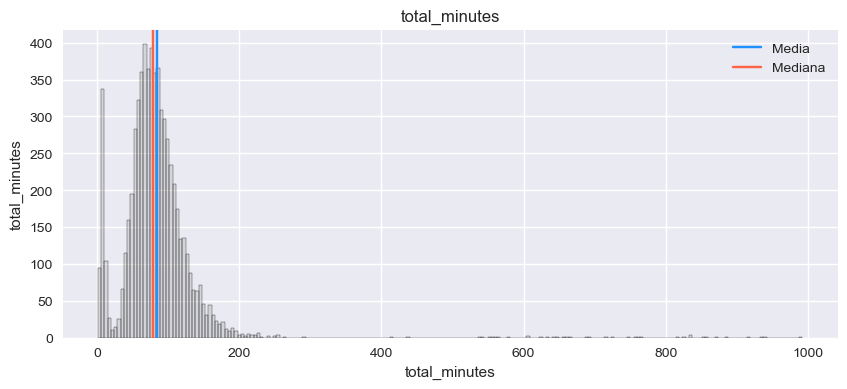

In [3]:
plt.figure(figsize = (10, 4))
plot_hist(df, 'total_minutes')

**Comentarios:**  
Se observa que la distribución tiene una alta concentración entre 0 a 200 minutos de total_minutes, con un promedio de 83 minutos. Sin embargo, tiene casos que escapan hasta los 1000 minutos. Estos últimos corresponden a pedidos que se hicieron durante la madrugada del mismo día o al final del día anterior, y que son menos frecuentes.

### Total minutes en función de distancia
Se revisará el comportamiento del tiempo en función de la distancia. Inicialmente, se analizará cómo se distribuye la distancia.

count    6488.000000
mean        1.998618
std         1.827004
min         0.005381
25%         0.741508
50%         1.449882
75%         2.767593
max        26.685204
Name: distancia, dtype: float64

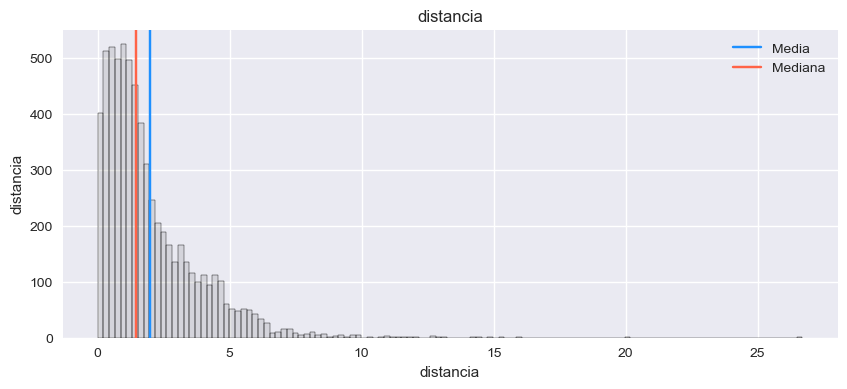

In [4]:
#La primera línea de código crea una figura con un ancho de 10 unidades y un alto de 4 unidades. 
#La siguiente línea llama a una función plot_hist para generar un histograma de la columna distancia en el dataframe df. 
#Finalmente, la última línea imprime un resumen estadístico de la columna distancia, que incluye la media, desviación estándar, mínimo, máximo, etc.
plt.figure(figsize = (10, 4));
plot_hist(df, 'distancia');
df['distancia'].describe()

**Comentarios**  
Se observa el histograma de la distancia, en kilómetros. La media de distancia corresponde a 2km, número que hace sentido dado el contexto del problema. Si bien se observan distancias de hasta 26 kilómetros, estos casos son los menores y se consideran posibles. La mitad de los pedidos se entregan en una distancia menor a 1.45km.

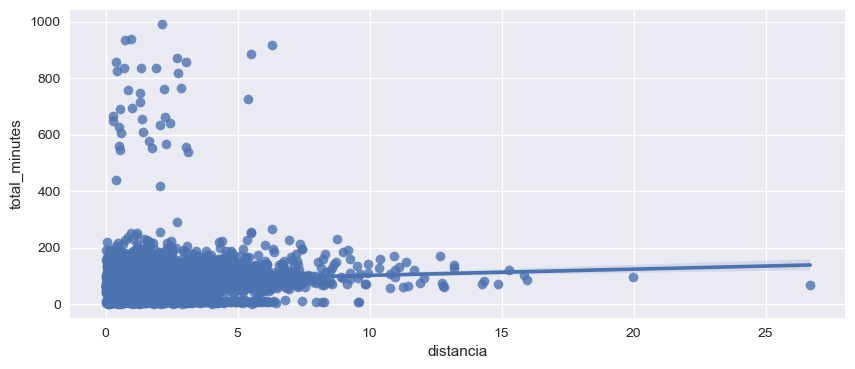

In [5]:
plt.figure(figsize = (10, 4))
sns.regplot(df, x = 'distancia', y = 'total_minutes');

**Comentarios**  
A priori, por la nube de puntos no se observa una relación clara. Sin embargo, la recta de regresión muestra que a mayor distancia mayor es la cantidad de minutos. Lo anterior tiene sentido con el contexto.

### Total minutes en función de on_Demand
Veremos cómo se comporta el tiempo de entrega en función de si el pedido fue solicitado en "menos de 90 minutos". En este sentido, True representa pedido en menos de 90 minutos.

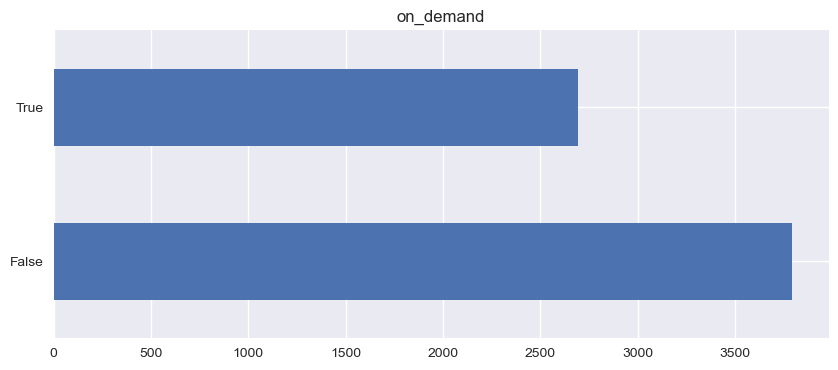

In [6]:
# Countplot de on_demand
plt.figure(figsize = (10, 4))
df['on_demand'].value_counts().plot(kind="barh")
plt.title('on_demand');

**Comentarios**  
Del total de datos, hay una proporción ligeramente mayor de pedidos no hechos "on demand". Sin embargo, se observa balanceo.


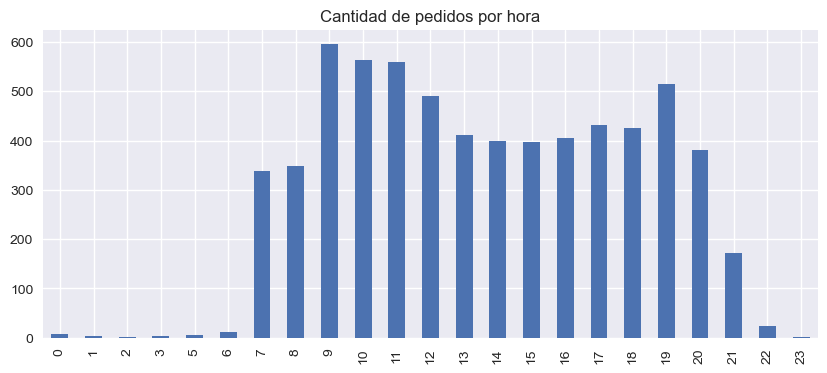

In [7]:
# De cara a analizar el comportamiento por hora, es necesario generar una nueva columna.
df['hora_de_pedido_aprox'] = df['order_time'].dt.hour

plt.figure(figsize = (10, 4))
df['order_time'].dt.hour.value_counts().sort_index().plot(kind="bar");
plt.title('Cantidad de pedidos por hora');

**Comentarios**  
Este gráfico de barras muestra la cantidad de pedidos realizados por cada hora del día. Se aprecia que hay una baja cantidad de pedidos realizados entre las 22 horas y las 6 horas. Las horas de mayor movimiento son entre las 9 a las 12, así como las 19 horas.

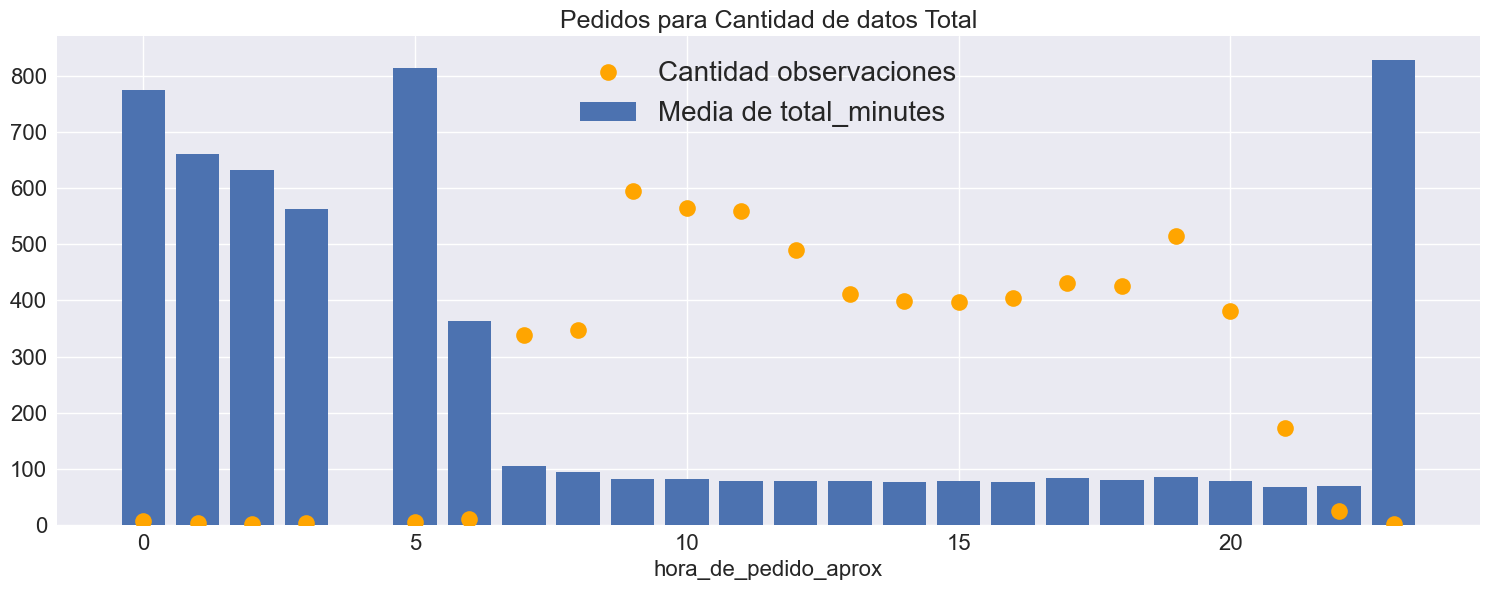

In [8]:
# Generamos un df auxiliar y temporal que nos sirva para graficar el evolutivo diario total
df_temp = df.copy()
df_temp['Cantidad de datos'] = 'Total'
plot_grouped_bar(df_temp, 'hora_de_pedido_aprox', 'Cantidad de datos', 'total_minutes', (15, 6));

**Comentarios**  
El gráfico muestra la cantidad de pedidos y el tiempo promedio para las distintas horas del día. Se comprueba nuevamente que hay una cantidad menor de pedidos en las horas de la noche y en las primeras horas de la mañana. Además, que los pedidos más largos son los que se hacen en el horario nocturno.

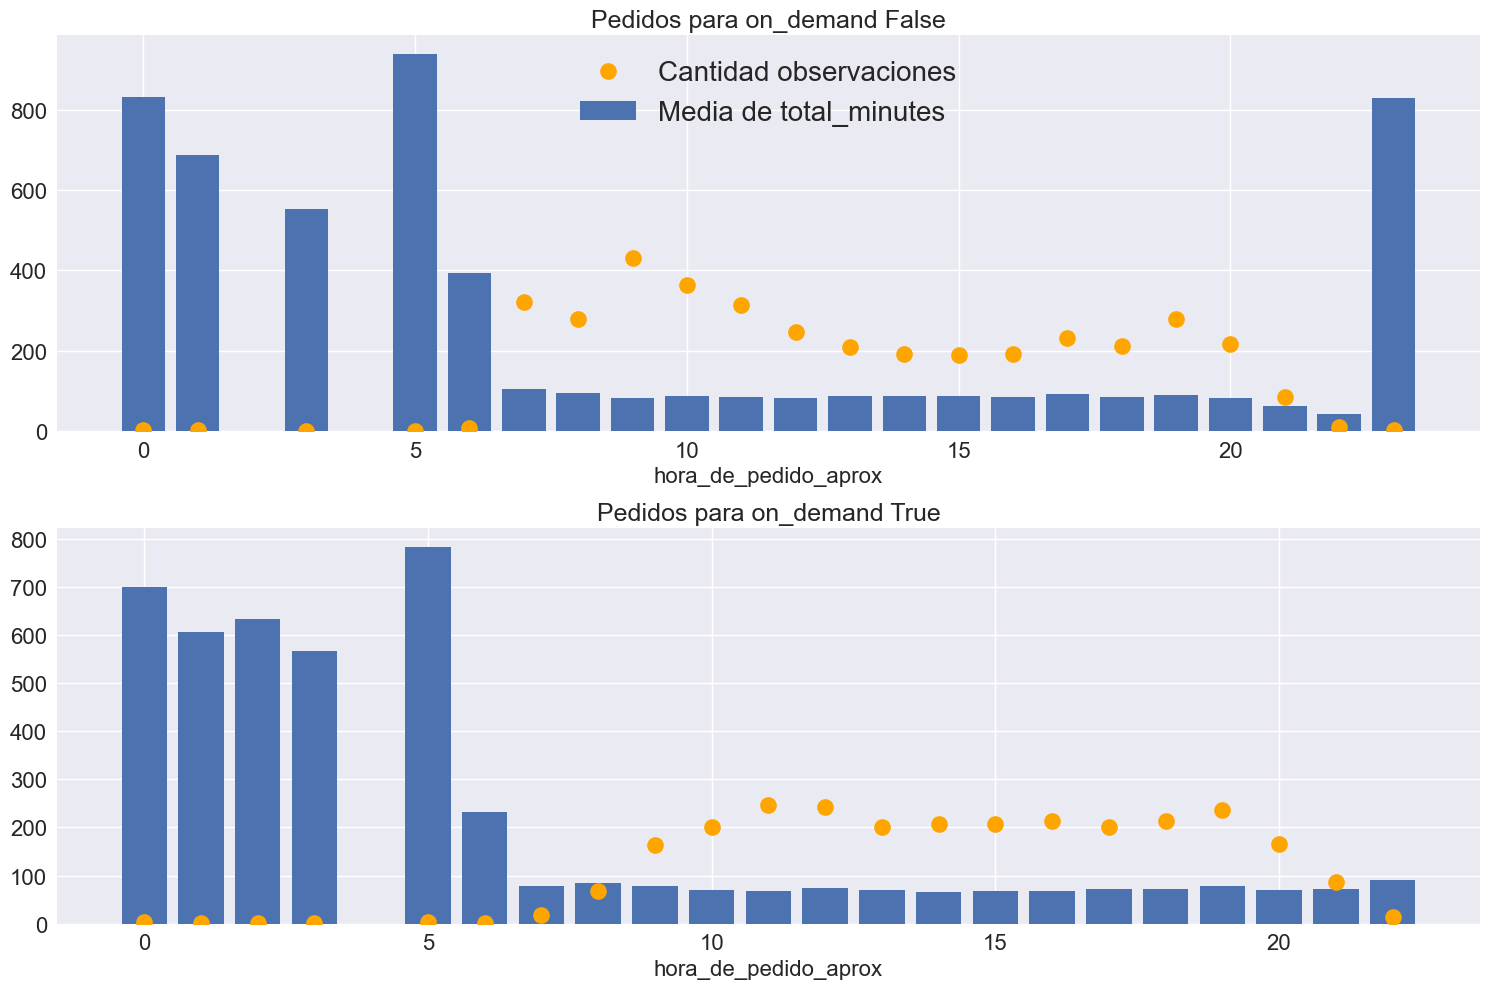

In [9]:
plot_grouped_bar(df, 'hora_de_pedido_aprox', 'on_demand', 'total_minutes', (15, 10))

**Comentarios**  
Nuevamente, al dividir los gráficos según 'on demand' el comportamiento sigue siendo exactamente el mismo. Cabe mencionar que los pedidos que no se hacen para "menos de 90 minutos" (gráfico superior) comienzan a las 7 u 8 de la mañana. En cambio, el resto parte con más fuerza a las 9 am.


### Total minutes en función de dow
Veremos cómo se comporta el tiempo de entrega en función del día de la semana. 

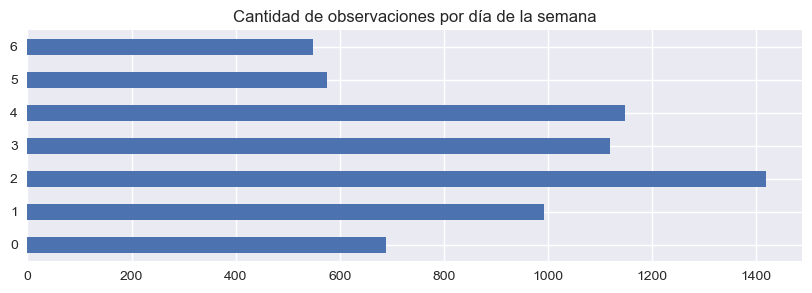

In [10]:
# Gráfico de barras con tiempo por día de semana
plt.figure(figsize = (10, 3))
df['dow'].value_counts().sort_index().plot(kind="barh");
plt.title('Cantidad de observaciones por día de la semana');

**Comentarios**  
Los días con más pedidos son el lunes al jueves. En cambio, viernes, sábado y domingo tienen menos. Como posible extensión, sería interesante saber si esto es un sesgo de la muestra o se debe a la naturaleza del negocio.

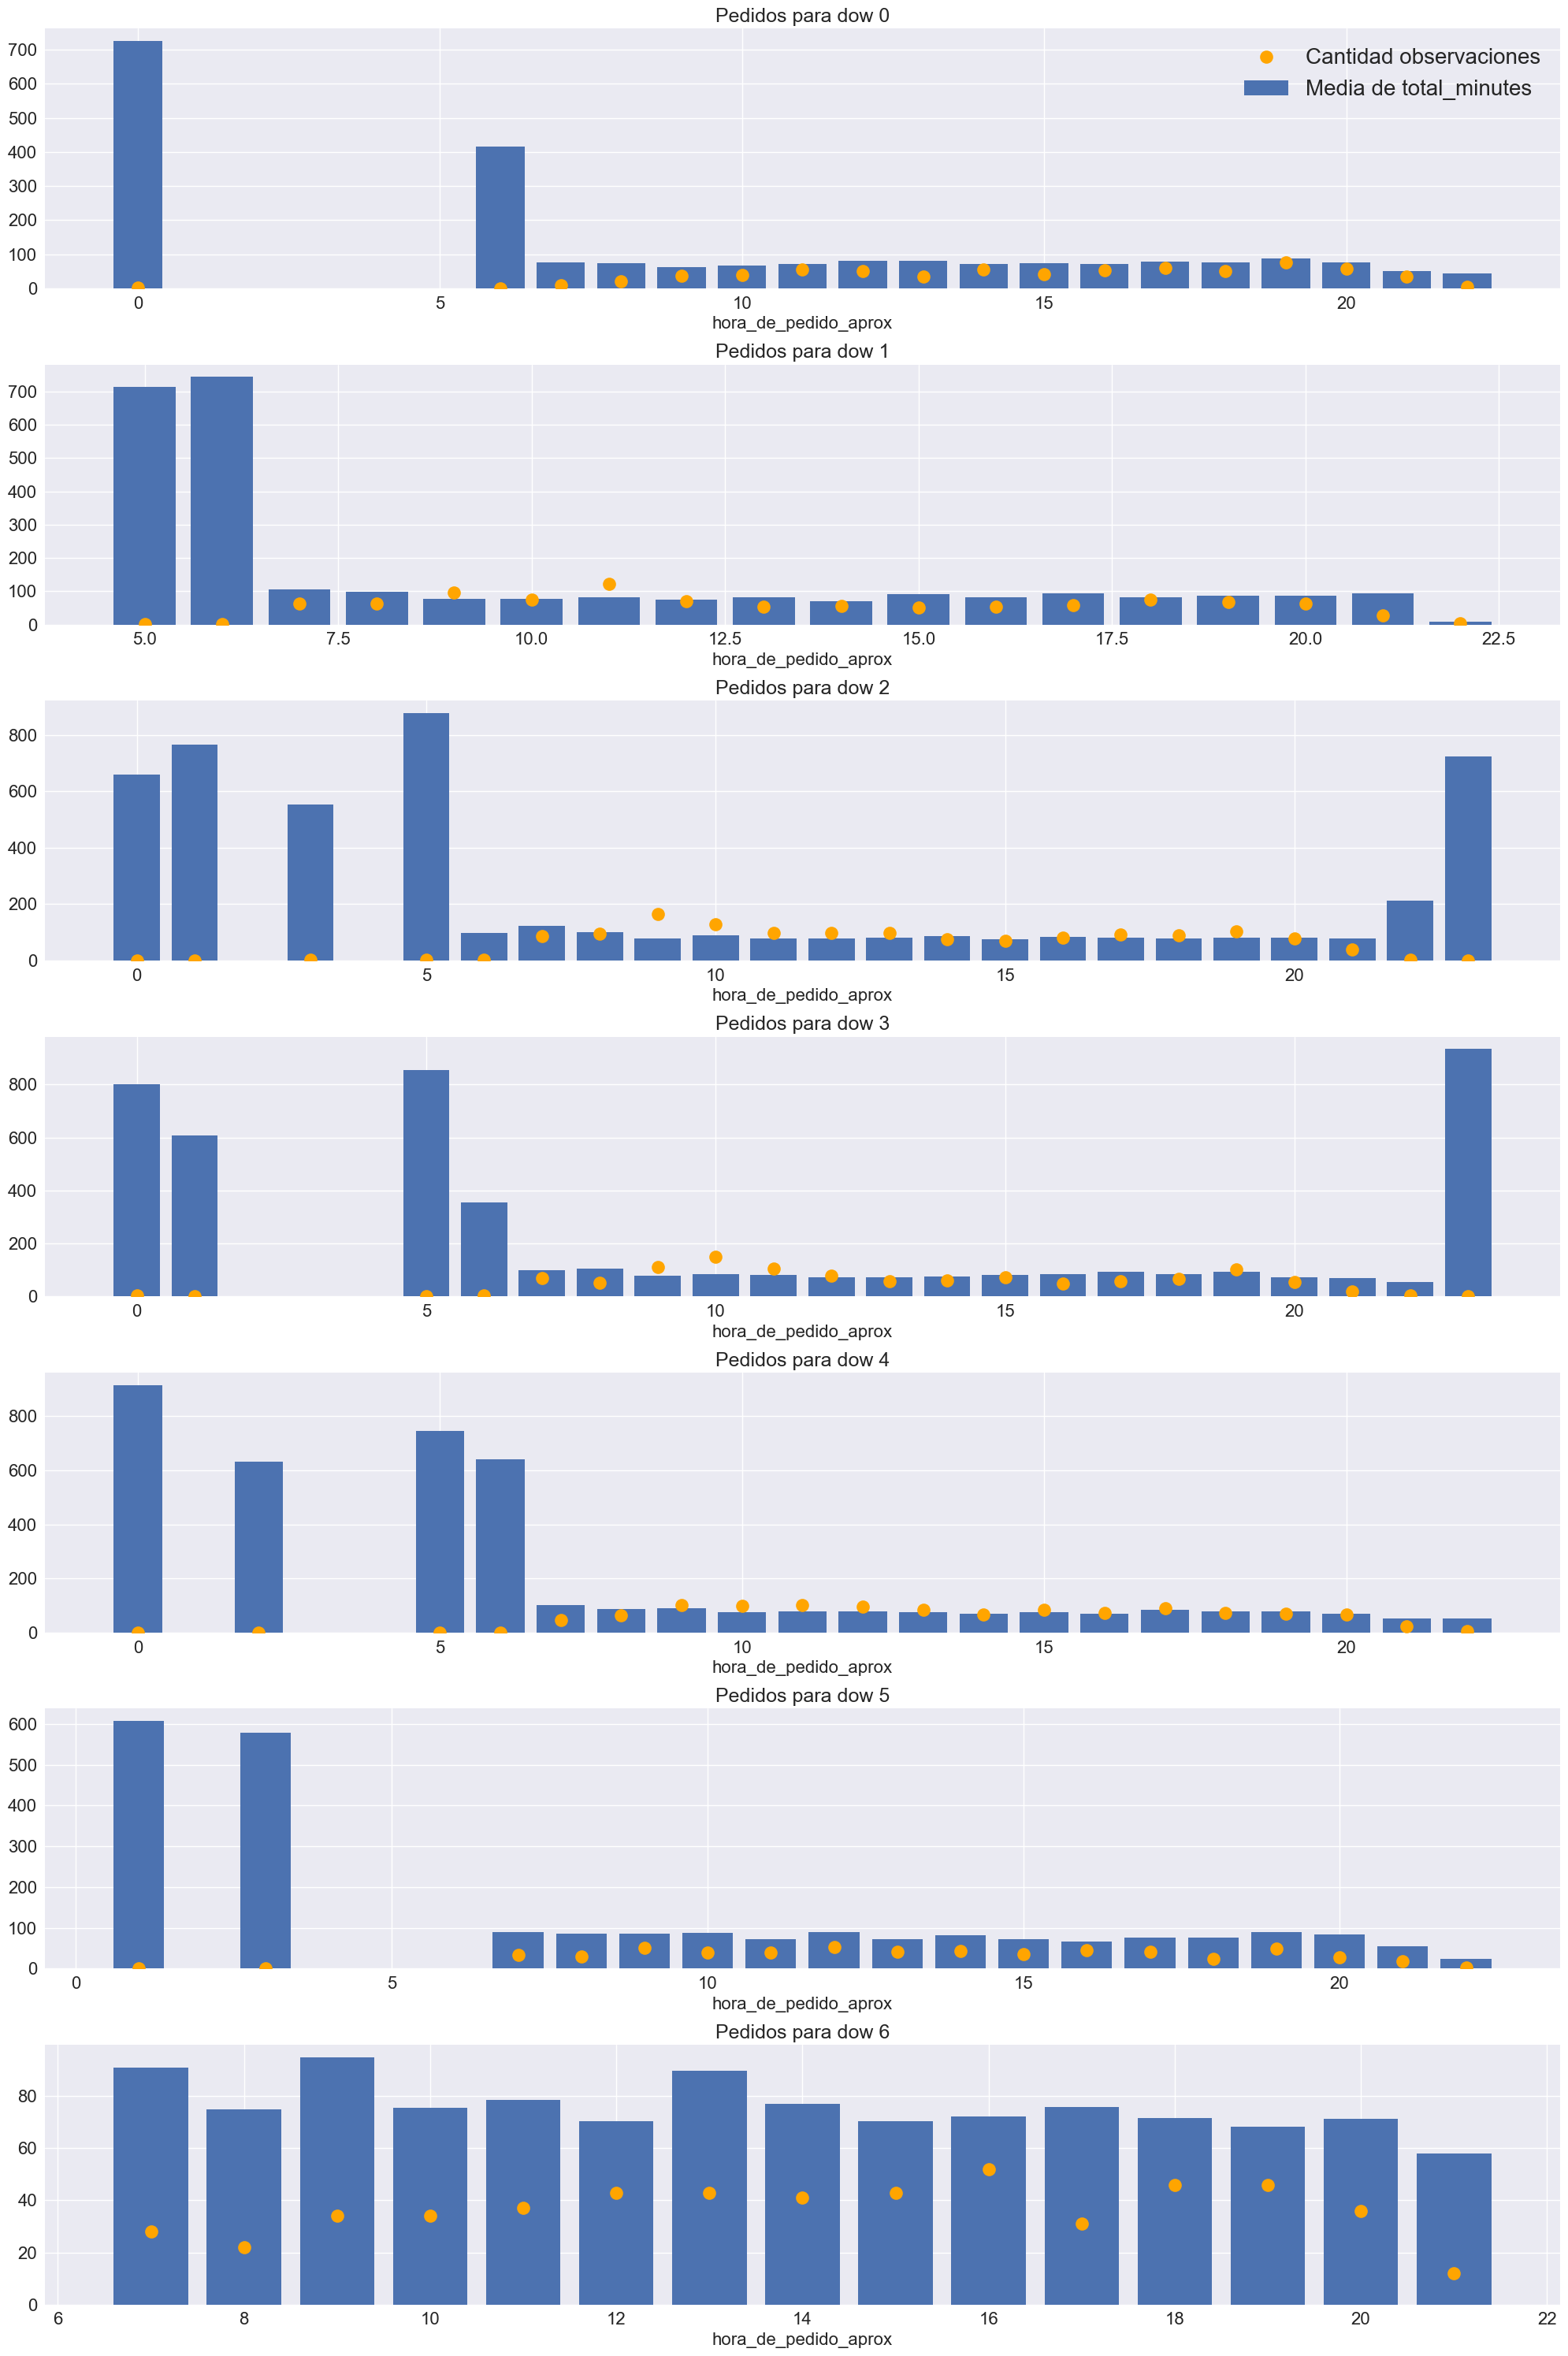

In [11]:
# Barplot por día semana y dow (definimos horario punta)
plot_grouped_bar(df, 'hora_de_pedido_aprox', 'dow', 'total_minutes', (20, 30))

**Comentarios**  
Al dividir por día de semana, el comportamiento de las horas del día no varía de forma relevante. La tónica general es la misma, los pedidos hechos durante las horas de la noche/primera mañana tienden a tener tiempos promedio más largo. Sin embargo, son menos. Este comportamiento cambia el día sábado (último gráfico) ya que allí no hay pedidos nocturnos (post 22hrs).  

Dados los comentarios, a continuación se genera una nueva columna que busca modelar este comportamiento. Los pedidos que están entre las 23 y las 6 serán considerados nocturnos, mientras que los realizados entre 9 a 12 hrs. y a las 19 hrs.serán considerados hora punta. Toda otra hora será Horario valle.

In [12]:
df['horario'] = np.where(
    df['hora_de_pedido_aprox'].isin([23, 1, 2, 3, 4, 5, 6]),
    'HorarioNocturno',
    np.where(
        df['hora_de_pedido_aprox'].isin([9, 10, 11, 12, 19]),
        'HorarioPunta',
        'HorarioValle'
    )
)

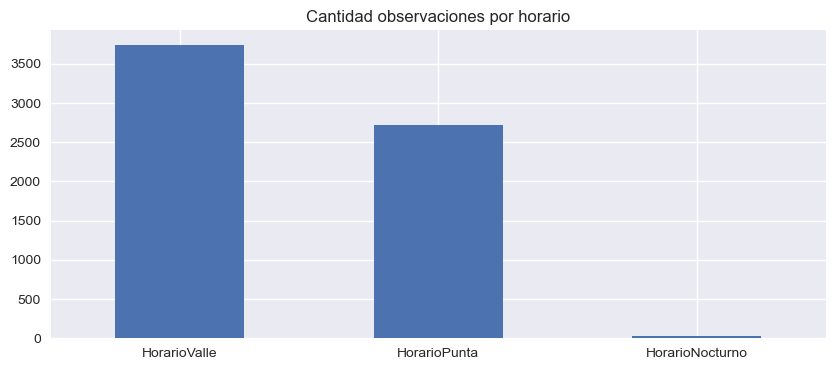

In [13]:
plt.figure(figsize = (10, 4))
df['horario'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0);
plt.title('Cantidad observaciones por horario');

**Comentarios**  
Se observa que la gran mayoría de los pedidos cae en el horario valle y en horario punta. Por otra parte, el horario nocturno tiene pocos casos. Pese a esto, es preferible dejarlo marcado ya que esos pocos casos presentan un comportamiento distinto.


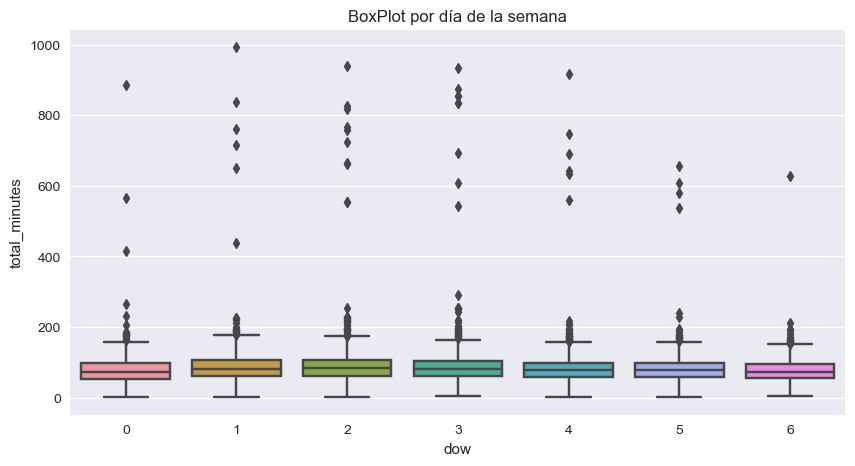

In [14]:
plt.figure(figsize = ((10, 5)));
sns.boxplot(x = df['dow'], y=df['total_minutes']);
plt.title('BoxPlot por día de la semana');

**Comentarios**  
Al generar el boxplot por día de la semana se observan dos cosas principalmente: Por un lado, el promedio de tiempo es bastante parejo por día de la semana. Además, todos los días existen casos que podrían ser considerados outliers. Si bien podría funcionar eliminarlos, se decide no hacerlo ya que son pedidos nocturnos.

### Total minutes en función de información repartidor
En esta sección se muestran gráficos y comentarios de cómo se relaciona la información del repartidor con el tiempo total.

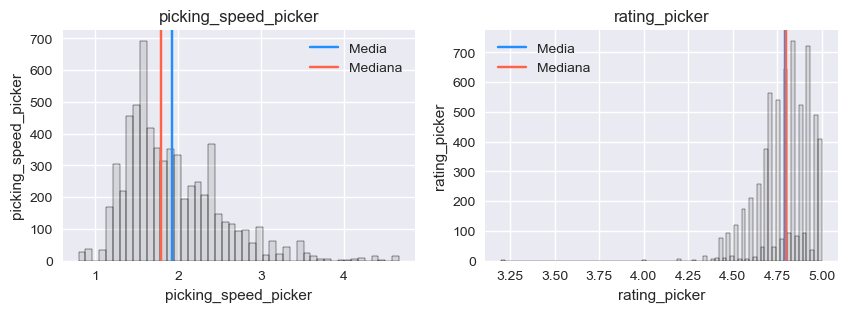

In [15]:
plt.figure(figsize = (10, 3))

plt.subplot(1, 2, 1)
plot_hist(df, 'picking_speed_picker')

plt.subplot(1, 2, 2)
plot_hist(df, 'rating_picker')

**Comentarios**  
Se observa que la velocidad promedio de recolección es cercana a 2, con una mediana ligeramente menor. En cambio, al rating de los pickeadores, el promedio es bastante alto, de 4.75. Esto tiene sentido ya que posiblemente los pickeadores con menor rating no continúan.


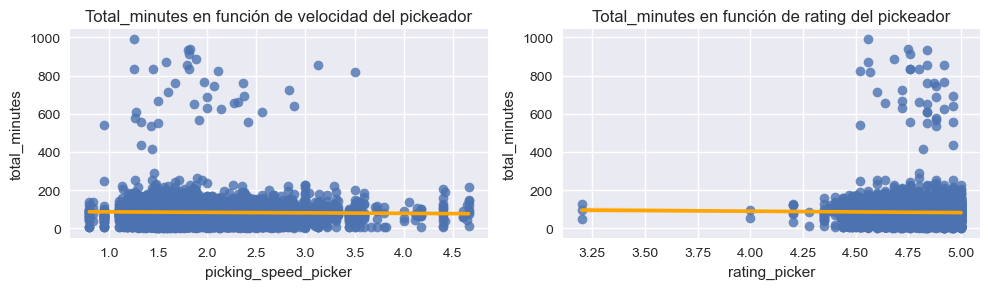

In [16]:
plt.figure(figsize = (10, 3))

plt.subplot(1, 2, 1)
sns.regplot(df, x = 'picking_speed_picker', y = 'total_minutes', line_kws = {'color': 'orange'});
plt.title('Total_minutes en función de velocidad del pickeador');

plt.subplot(1, 2, 2)
sns.regplot(df, x = 'rating_picker', y = 'total_minutes', line_kws = {'color': 'orange'});
plt.title('Total_minutes en función de rating del pickeador');

plt.tight_layout()

**Comentarios**  
Si bien el comportamiento esperado sería que el tiempo total baje en función de la velocidad del pickeador o de su rating, en la práctica esto no es perceptible en los gráficos anteriores. Es muy posible que esto se deba a que incluso el mejor pickeador o el más rápido no pueden incidir de manera tan fuerte en el tiempo total de entrega, sino que sólo en el tiempo de armado de pedido. De todas formas son variables relevantes de cara a la modelación.

### Total minutes en función de info productos

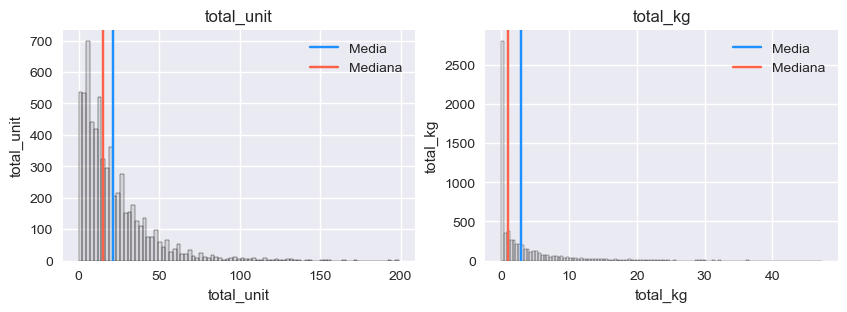

In [17]:
plt.figure(figsize = (10, 3))

plt.subplot(1, 2, 1)
plot_hist(df, 'total_unit')

plt.subplot(1, 2, 2)
plot_hist(df, 'total_kg')

**Comentarios**  
Se observa que tanto en unidades como en kilos existe una gran presencia de pedidos cercanos a 0, mientras que pedidos más grandes son posibles, pero con mucha menor frecuencia.

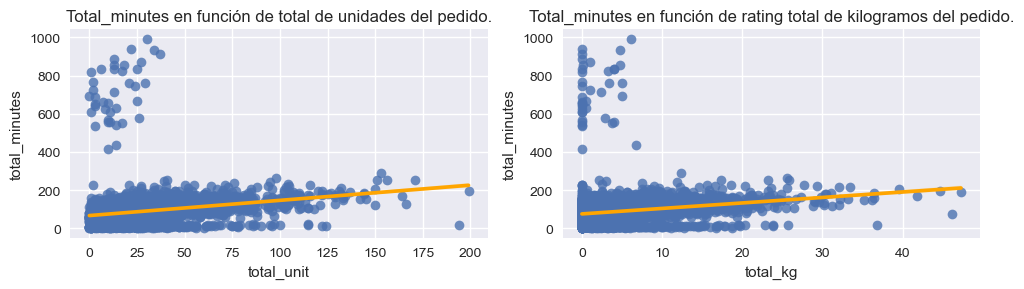

In [18]:
plt.figure(figsize = (10, 3))

plt.subplot(1, 2, 1)
sns.regplot(df, x = 'total_unit', y = 'total_minutes', line_kws = {'color': 'orange'});
plt.title('Total_minutes en función de total de unidades del pedido.');

plt.subplot(1, 2, 2)
sns.regplot(df, x = 'total_kg', y = 'total_minutes', line_kws = {'color': 'orange'});
plt.title('Total_minutes en función de rating total de kilogramos del pedido.');

plt.tight_layout()

**Comentarios**  
Se observa que tanto para las unidades totales del pedido como para los kilos hay un efecto positivo sobre el total de minutos. Esto tiene sentido ya que pedidos más grandes requieren mayor tiempo de pickeo e incluso podrían requerir un transporte especial.

## Error modelo actual
En esta sección se trabaja con el error del modelo base presentado. Como tal, se cuenta con la estimación de tiempo para cada orden. Se trabajará con 3 tipos de error:
- Mean Squared Error: promedio de los errores al cuadrado. Particularmente útil ya que castiga más las observaciones más alejadas. Sensible a outliers.
- Raiz del Mean Squared Error: raiz del indicador anterior. Tiene la ventaja de que es más interpretable.
- Median absolute error: Mediana de los errores absolutos. Es insensible a outliers.

### Generación dataframe error
A continuación, se genera un dataframe que contiene los errores del modelo actual, además de las columnas necesarias para su cálculo. Posteriormente, se calculan y muestran los errores, tanto el error cuadrático medio como el error mediano absoluto.

In [19]:
# El código comienza seleccionando ciertas columnas del dataframe df y creando una copia del mismo en la variable df_error. Luego, agrega dos columnas nuevas a df_error:
# La columna Error contiene el valor absoluto de la diferencia entre las columnas total_minutes y model_1_time.
# La columna Error2 contiene el valor cuadrado de la columna Error.
# Finalmente, se imprime la primera parte de df_error para verificar que se hayan agregado las columnas correctamente.
# En resumen, este código permite calcular y agregar dos medidas de error a un dataframe.

df_error = df[['dow', 'total_minutes', 'model_1_time', 'hora_de_pedido_aprox']].copy()
df_error['Error'] = np.abs(df_error['total_minutes'] - df['model_1_time'])
df_error['Error2'] = np.square(df_error['Error'])
df_error.head()

,dow,total_minutes,model_1_time,hora_de_pedido_aprox,Error,Error2
0,2,91.800861,151.550861,10,59.750000,3570.062500
1,2,206.599732,358.433065,7,151.833333,23053.361106
2,2,93.458001,112.624668,9,19.166667,367.361111
3,2,124.778761,142.995428,7,18.216667,331.846944
4,2,130.321208,182.437875,7,52.116667,2716.146944


In [20]:
mean_squared_error = df_error['Error2'].mean()
raiz_mean_squared_error = np.sqrt(mean_squared_error)
meadian_absolute_error = df_error['Error'].median()

print(f'El error cuadrático medio es {mean_squared_error:.2f} minutos cuadrados, mientras que su raiz es {raiz_mean_squared_error:.2f} minutos.')
print(f'El error absoluto mediano es {meadian_absolute_error:.2f} minutos.')

El error cuadrático medio es 1929.16 minutos cuadrados, mientras que su raiz es 43.92 minutos.
El error absoluto mediano es 34.82 minutos.


**Comentarios**  
Se muestran distintos indicadores de error dado el modelo construido. El error cuadrático medio es de 1.929  minutos cuadrados, es decir 44 minutos. Por otro lado, el error absoluto mediano es de 35 minutos.

### Errores por día de la semana
A continuación, se analiza el comportamiento del error por día de la semana.

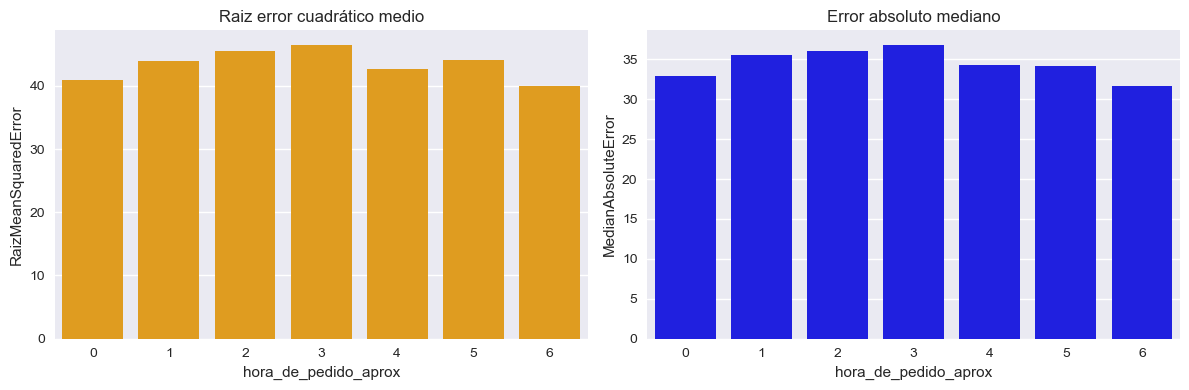

In [21]:
tmp = df_error.copy()
tmp_grouped = tmp.groupby(['dow']).agg(
        {
            'Error': np.median, 
            'Error2': np.mean
        }
    ).reset_index()
tmp_grouped.columns = ['hora_de_pedido_aprox', 'MedianAbsoluteError', 'MeanSquaredError']
tmp_grouped['RaizMeanSquaredError'] = np.sqrt(tmp_grouped['MeanSquaredError'])

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
sns.barplot(
    tmp_grouped,
    x = 'hora_de_pedido_aprox',
    y = 'RaizMeanSquaredError',
    color = 'Orange'
);
plt.title(f"Raiz error cuadrático medio");

plt.subplot(1, 2, 2)
sns.barplot(
    tmp_grouped,
    x = 'hora_de_pedido_aprox',
    y = 'MedianAbsoluteError',
    color = 'blue'
);
plt.title(f"Error absoluto mediano");
plt.tight_layout();


**Comentarios**  
Tanto en el error cuadrático medio como en el error absoluto mediano el comportamiento a lo largo de la semana es muy similar. El error alcanza su peak el miércoles, con martes y lunes como segundo y tercer día con mas error. El día con menos errores es el domingo (0). El problema es que este es un día menos crítico de cara a la precisión del modelo, ya que usualmente la gente tiene más holgura. En cambio, un miércoles (día con mayor error), es posible que los clientes necesiten mucha precisión en sus estimaciones.

### Errores por día de la semana y hora del día
A continuación, se muestran múltiples gráficos de error agrupados por hora del pedido. Inicialmente, se muestra el total, pero después se muestra por día de la semana.

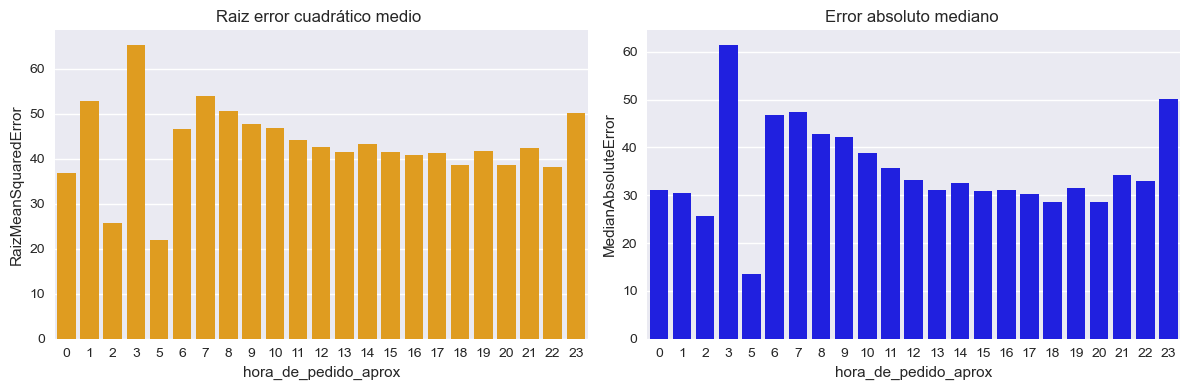

In [22]:
# Error cuadrático total
graficar_error(df_error, (12, 4))

**Comentarios**  
Nuevamente, se observa que ambas métricas de error tienen comportamientos bastante similares. Así, en cualquiera de los dos gráficos se observa un mayor error para los pedidos hechos desde las 6 horas, que disminuye hasta el mediodía. Esto es crítico de cara a que es un horario en que posiblemente los clientes requieren mucha precisión ya que están planificando sus días/tardes. De cara a comparativas posteriores entre modelos se tomará en cuenta este criterio.

Si bien el mayor error es para los pedidos realizados a las 3am, es un horario en que hay menos pedidos, de modo que no es tan relevante.


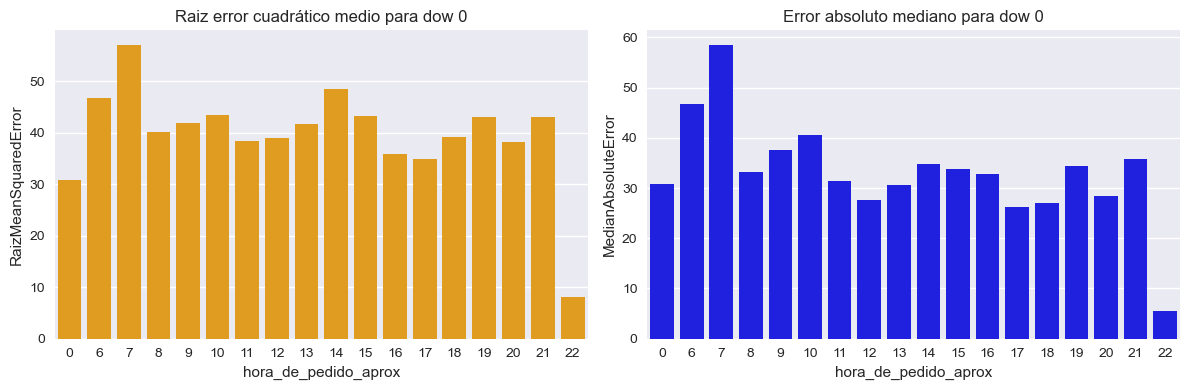

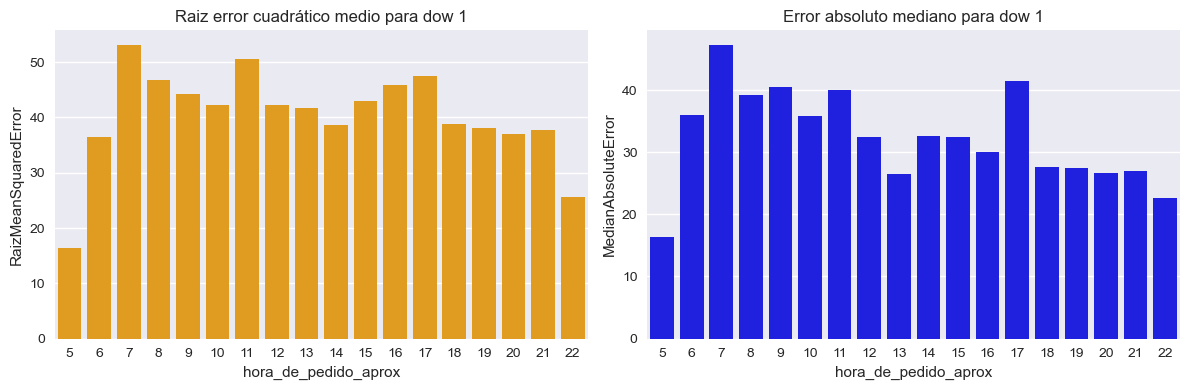

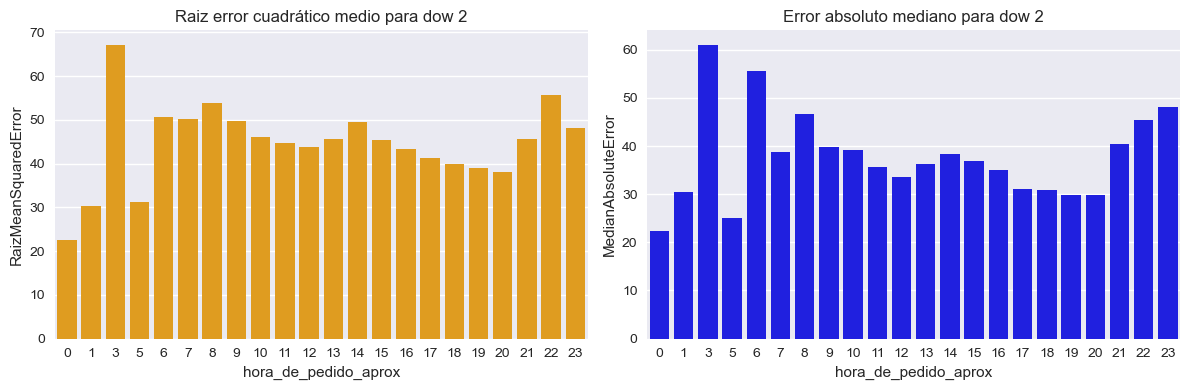

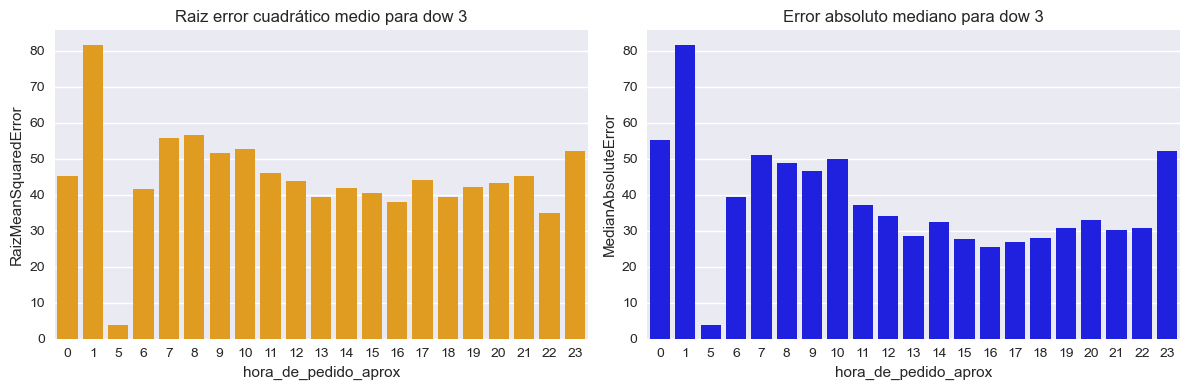

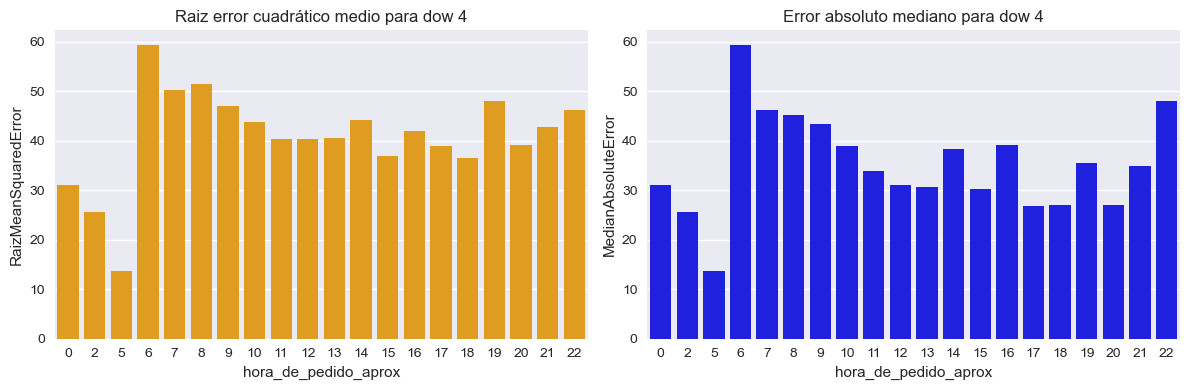

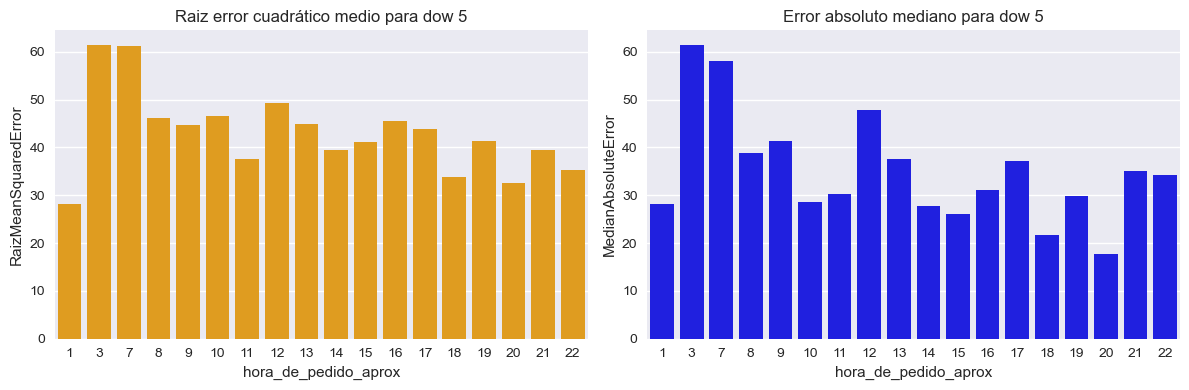

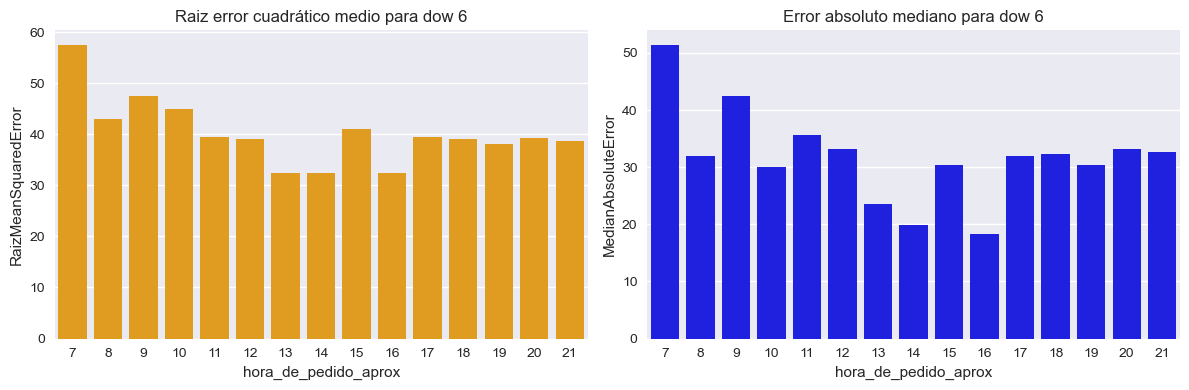

In [23]:
for i, g in enumerate(np.sort(df_error['dow'].unique())):
    graficar_error(df_error, (12, 4), g);   

**Comentarios**  
De martes a jueves se observa el comportamiento de tener un error más grande empezando la mañana que baja en la medida que avanza. En cambio, por ejemplo, el lunes tiene un error mucho más parejo durante todo el día.

## Guardando DataFrame
A continuación, guardaremos el dataframe

In [24]:
with option_context("display.max_columns", None):
    display(df.head(n = 5))   

,order_id,lat_order,lng_order,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,actual_reception_time,promised_delivery_time,total_minutes_td,order_time,model_1_dt_time,model_1_time,store,lat_store,lng_store,shopper_id_picker,seniority_picker,found_rate_picker,picking_speed_picker,accepted_rate_picker,rating_picker,shopper_id_driver,seniority_driver,found_rate_driver,picking_speed_driver,accepted_rate_driver,rating_driver,total_product,real_total_unit,real_total_kg,real_without_product,total_unit,total_kg,distancia,hora_de_pedido_aprox,horario
0,6abd5e28d01b7c733fe37485294235dc,18.22114,-10.03139,2,13:00:00,12:00:15,False,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861,1900-01-01 12:00:15,1900-01-01 13:00:00,0 days 01:31:48.051660,1900-01-01 10:28:26.948340000,0 days 02:31:33.051660,151.550861,60e4c4e1c1a8bc79123738227b9d0b08,18.23190,-10.03035,09bb5bfe76adbb474dddbdd111a51623,ADVANCED,0.86,1.56,1.00,4.68,09bb5bfe76adbb474dddbdd111a51623,ADVANCED,0.86,1.56,1.00,4.68,27.0,18.0,6.245,1.0,19.0,5.722,1.201490,10,HorarioPunta
1,0d37a1eea001f01b40232ffd496ff663,18.17771,-10.03570,2,13:00:00,10:28:10,False,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732,1900-01-01 10:28:10,1900-01-01 13:00:00,0 days 03:26:35.983919999,1900-01-01 07:01:34.016080001,0 days 05:58:25.983919999,358.433065,387d4a5b65cf4bf00ad805c4b00eed01,18.16396,-10.03289,c4c722114a82fa21654e57e9636d68b0,ADVANCED,0.85,1.14,1.00,4.76,c4c722114a82fa21654e57e9636d68b0,ADVANCED,0.85,1.14,1.00,4.76,103.0,114.0,40.614,20.0,150.0,39.562,1.557488,7,HorarioValle
2,528428e9b9eb5d3bd0dbdd8da692b087,18.26683,-10.03175,2,11:00:00,10:40:50,False,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001,1900-01-01 10:40:50,1900-01-01 11:00:00,0 days 01:33:27.480060,1900-01-01 09:07:22.519940000,0 days 01:52:37.480060,112.624668,0fae7b61265bc7ca4ce4d81440b62501,18.24565,-10.03324,e15c7a67d0ea9a54dffb410bc1d8528b,INTERMEDIATE,0.83,2.03,1.00,4.96,e15c7a67d0ea9a54dffb410bc1d8528b,INTERMEDIATE,0.83,2.03,1.00,4.96,6.0,6.0,0.000,0.0,6.0,0.000,2.360362,9,HorarioPunta
3,d3f7be6d64eae7405b7bf024e04807a2,18.24888,-10.03226,2,10:00:00,9:41:47,False,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761,1900-01-01 09:41:47,1900-01-01 10:00:00,0 days 02:04:46.725660,1900-01-01 07:37:00.274340000,0 days 02:22:59.725660,142.995428,60e4c4e1c1a8bc79123738227b9d0b08,18.23190,-10.03035,d1f0bd4b237c1358f09db22076b940e7,INTERMEDIATE,0.86,2.06,0.92,4.92,d1f0bd4b237c1358f09db22076b940e7,INTERMEDIATE,0.86,2.06,0.92,4.92,17.0,18.0,19.805,1.0,20.0,18.300,1.898837,7,HorarioValle
4,e0ad6533b6cd9a382ec6c1d473c5036c,18.22911,-10.03226,2,11:00:00,10:07:53,False,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208,1900-01-01 10:07:53,1900-01-01 11:00:00,0 days 02:10:19.272480,1900-01-01 07:57:33.727520000,0 days 03:02:26.272480,182.437875,452ae015bf846e1d2932b7ea15720d64,18.23159,-10.03145,06a71e8ab0c6db5ce22a4689fd76a3f4,ADVANCED,0.86,1.89,1.00,4.92,06a71e8ab0c6db5ce22a4689fd76a3f4,ADVANCED,0.86,1.89,1.00,4.92,44.0,28.0,11.575,3.0,31.0,7.721,0.288728,7,HorarioValle


In [25]:
pickle.dump(df, open('data/output/dataset_pre_modelacion.plk', 'wb'))

In [26]:
df.to_csv('data/output/dataset_pre_modelacion.csv', index = False)

In [27]:
df.to_excel('data/output/dataset_pre_modelacion.xlsx', index = False)